# Project: Investigating the TMDb Movie DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This dataset contans the following attributes:</br>
1. id - A unique identifier for each movie.
2. imdb_id - Unique identifier for each movie in IMDB.
3. popularity - Numeric value representing the movie's popularity.
4. budget - How much was budgeted to make the movie.
5. revenue - Proceeds from the movie.
6. original_title - Title before adaptions.
7. cast - Names of the lead actors and supporting actors.
8. homepage - Link to the movie's official homepage.
9. director - The director(s) of the movie.
10. tagline - Movie Tagline.
11. keywords - Words related to or associated with the movie.
12. overview - Brief summary of the movie.
13. runtime - Duration of the movie in minutes.
14. genres - The genre of the movie.
15. production_companies - The movie production house.
16. release_date - Date of movie release.
17. vote_count - Number of ratings the movie received.
18. vote_average - Average user ratings.
19. release_year - Year the movie was released.
20. budget_adj - Budget of associated movie in terms of  2010 dollars, accounting for inflation over time.
21. revenue_adj - Revenue of associated movie in terms of 2010 dollars, accounting for inflation over time. </br>



Some questions that would be answered in this dataset include:

1. What is the average profit generated by movies produced in each year? 
2. What movies generated the least profits?
3. What is the most popular movie?
4. What is the least popular movie?
5. What is the relationships between popularity, revenue and user ratings?
6. What is the relationship between revenue and profit?

In [96]:
#Importing packages needed

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [97]:
#Loading and Inspecting the dataset

os.chdir('C:/temp')

df = pd.read_csv('movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [98]:
#Summary statistics of the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [99]:
#Number of rows and columns

df.shape

(10866, 21)

In [100]:
#Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning </br>

This involves the following:

1. Dropping columns not relevant to the study
2. Checking for zero values and replacing them with NaN
3. Checking for nulls and dropping null values
4. Finding and dropping duplicates
5. Checking the datatypes

In [101]:
#Dropping columns not relevant to the study

df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'release_date', 'keywords'], axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [102]:
#Checking for zero values in budget, revenue, budget_adj, revenue_adj and runtime

zero = df[(df['budget'] == 0) | (df['revenue'] == 0) | (df['budget_adj'] == 0) | (df['revenue_adj'] == 0) | (df['runtime'] == 0)]
zero.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,81,5.5,2015,0.000000e+00,4.222338e+04


In [103]:
#Replacing the zero values with NaN

df.budget.replace(0, np.NaN, inplace=True)
df.revenue.replace(0, np.NaN, inplace=True)
df.budget_adj.replace(0, np.NaN, inplace=True)
df.revenue_adj.replace(0, np.NaN, inplace=True)
df.runtime.replace(0, np.NaN, inplace=True)


In [104]:
#Dropping the null values
df.dropna(inplace= True)

#Confirming if any null values are left
df.isna().sum().any()

False

In [105]:
#Checking for duplicates in the dataframe
sum(df.duplicated())

1

In [106]:
#Dropping duplicates
df.drop_duplicates(inplace= True)

#Comfirming the above action
sum(df.duplicated())

0

In [107]:
#Renaming the vote_average column
df.rename(columns= {'vote_average':'user_rating'}, inplace=True)

#Checking the new dataset
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,user_rating,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [108]:
#Checking the new dataframe size
df.shape

(3805, 15)

In [109]:
#Checking the new dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   budget                3805 non-null   float64
 3   revenue               3805 non-null   float64
 4   original_title        3805 non-null   object 
 5   cast                  3805 non-null   object 
 6   director              3805 non-null   object 
 7   runtime               3805 non-null   float64
 8   genres                3805 non-null   object 
 9   production_companies  3805 non-null   object 
 10  vote_count            3805 non-null   int64  
 11  user_rating           3805 non-null   float64
 12  release_year          3805 non-null   int64  
 13  budget_adj            3805 non-null   float64
 14  revenue_adj           3805 non-null   float64
dtypes: float64(7), int64

We have a total of 3805 rows and 15 columns, all the datatypes are correct and the data is now ready for analysis.

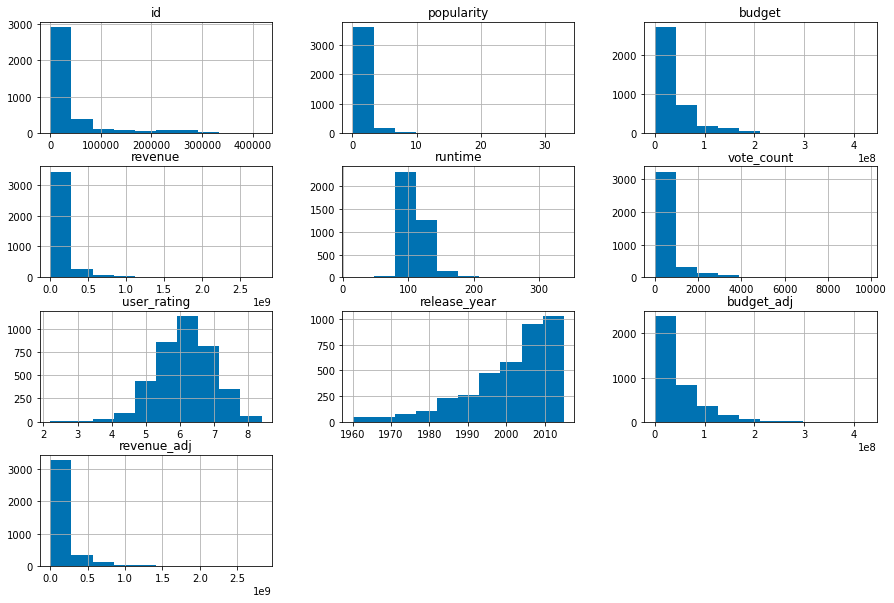

In [110]:
#Exploring the distribution of the data
df.hist(figsize=(15,10));

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: What is the average profit generated by movies produced in each year? 

In [111]:
#Creating a new column profit
df['profit'] = df['revenue'] - df['budget']
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'vote_count',
       'user_rating', 'release_year', 'budget_adj', 'revenue_adj', 'profit'],
      dtype='object')

In [112]:
#Calculating the mean revenues for each year
average_profits = df.groupby('release_year')['profit'].mean()
average_profits

release_year
1960    2.163961e+07
1961    2.990832e+07
1962    2.383998e+07
1963    1.923531e+07
1964    4.209691e+07
1965    7.985637e+07
1966    1.049374e+07
1967    4.894882e+07
1968    1.869686e+07
1969    5.171575e+07
1970    4.127909e+07
1971    2.586805e+07
1972    5.715449e+07
1973    8.814051e+07
1974    5.004477e+07
1975    8.980081e+07
1976    4.196177e+07
1977    9.175308e+07
1978    5.912353e+07
1979    5.939563e+07
1980    4.356807e+07
1981    4.400838e+07
1982    6.968294e+07
1983    4.855077e+07
1984    4.365329e+07
1985    4.065607e+07
1986    3.554561e+07
1987    4.670754e+07
1988    4.133906e+07
1989    7.066551e+07
1990    6.637741e+07
1991    6.096243e+07
1992    7.307634e+07
1993    6.355317e+07
1994    7.719727e+07
1995    7.130406e+07
1996    5.648760e+07
1997    7.089157e+07
1998    5.858212e+07
1999    5.545870e+07
2000    5.851400e+07
2001    6.764983e+07
2002    7.190571e+07
2003    7.605087e+07
2004    6.919272e+07
2005    5.840150e+07
2006    5.190655e+07


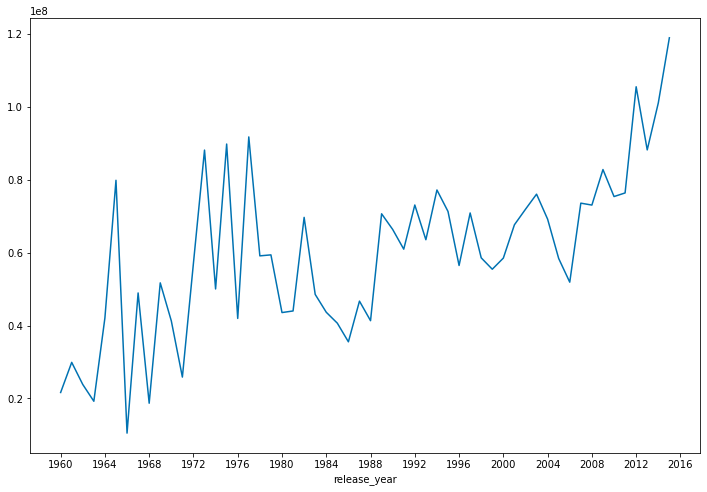

In [113]:
#Plotting a line graph to visualize the revenue over the years
average_profits.plot(kind='line', figsize=(12,8),xticks= np.arange(1960,2020,4))

#Labels
plt.xlabel = ('Release Year')
plt.ylabel = ('Profit')
plt.title = ('Average Profit Generated by Year')

plt.show()

This chart represents the average profits from movies released in each year. A slow increase in profits is seen across the years. Movies produced in the year 1966 generated the least profit while movies produced in the year 2015 recorded the highest profit.

### Research Question 2: What movies generated the least profits?

In [114]:
#Sorting the values in the profit column in descending order
df_sort = df.sort_values('profit',ascending=False)

#Selecting the bottom 10 movies 
df2 = df_sort[['original_title', 'profit']].tail(10)
df2.set_index('original_title')

,profit
original_title,
Australia,-80445998.0
Flushed Away,-84540684.0
Charlotte's Web,-84999856.0
The Adventures of Pluto Nash,-92896027.0
The 13th Warrior,-98301101.0
Brother Bear,-99999750.0
Mars Needs Moms,-111007242.0
The Alamo,-119180039.0
The Lone Ranger,-165710090.0


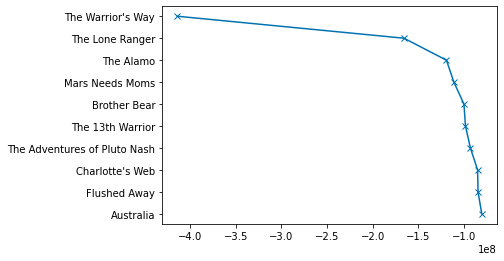

In [115]:
#Plotting a line graph to visualize the change in revenue
plt.plot(df2.profit, df2.original_title, marker ='x')

#Labels
plt.title = ('Movies with the Least Profit')
plt.show()

This line chart shows the least 10 movies based on profits and their profits generated with The Warrior's way generating the least profit

### Research Question 3: What is the most popular movie?

In [116]:
# Using the function idmax() to find the index of the row with the highest value in the popularity column
x= 'popularity'
max=df[x].idxmax()
maxx = pd.DataFrame(df.loc[max,:])
maxx

,0
id,135397
popularity,32.985763
budget,150000000.0
revenue,1513528810.0
original_title,Jurassic World
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Colin Trevorrow
runtime,124.0
genres,Action|Adventure|Science Fiction|Thriller
production_companies,Universal Studios|Amblin Entertainment|Legenda...


The most popular movie: Jurassic World was released in the year 2015 and was directed by Colin Trevorrow with a rating of 6.5

### Research Question 4: What is the least popular movie?

In [117]:
# Using the function idmin() to find the index of the row with the lowest value in the popularity column
x= 'popularity'
min=df[x].idxmin()
minn = pd.DataFrame(df.loc[min,:])
minn

,6065
id,203793
popularity,0.010335
budget,30000000.0
revenue,68129518.0
original_title,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´
cast,Thomas Kretschmann|Yanina Studilina|Philippe R...
director,Fyodor Bondarchuk
runtime,131.0
genres,War|Action
production_companies,Art Pictures Studio


The least popular movie: Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´ was released in the year 2013 and was directed by Fyodor Bondarchuk with a rating of 5.5

### Research Question 5: What is the relationship between popularity, profits and user ratings?

In [119]:
#Defining a function to create the scatter plot

def cust_plot(ax, x, y, x_label, y_label, graph_title, font_size):
    ax.scatter(x,y)
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(graph_title, fontsize=font_size)

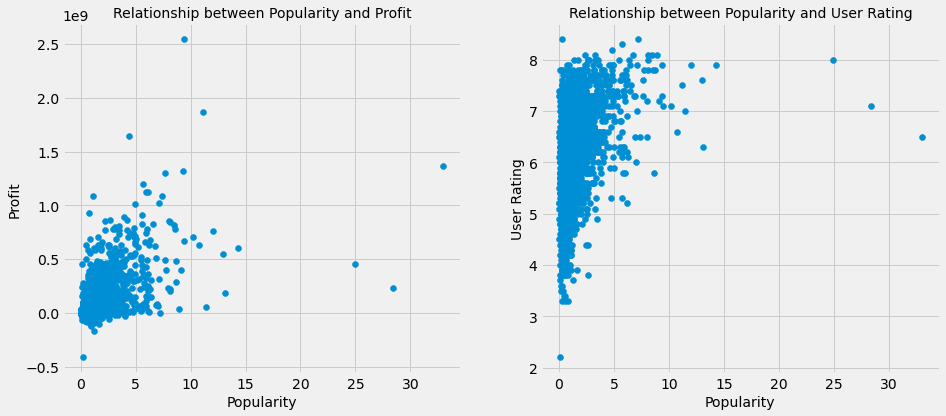

In [125]:
#Using the cust_plot() function to create the scatter plot

plt.style.use('fivethirtyeight')
fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,6))
cust_plot(ax, df["popularity"], df["profit"], "Popularity", "Profit", "Relationship between Popularity and Profit", 14)
cust_plot(ax1, df["popularity"], df["user_rating"], "Popularity", "User Rating", "Relationship between Popularity and User Rating", 14)


The scatter plots check for relationships between polularity, profit and user ratings. While the second plot shows no definite relationship between popularity and user ratings, the first plot shows that correlation exists between popularity and revenue

### Research Question 6: What is the relationship between revenue and profit?

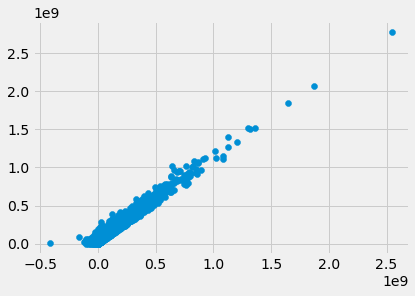

In [122]:
#Showing relationship with a scatter plot
plt.style.use('fivethirtyeight')
x=df.profit
y=df.revenue
plt.scatter(x,y);

#adding labels
plt.xlabel =('Profits')
plt.ylabel = ('Revenue')
plt.title = ('Relationship between Revenue and Profit')
plt.show()

The scatter plot shows the correlation between profits and revenue. It is a strong positive correlation as seen.

<a id='conclusions'></a>
## Conclusions

The dataset has been analysed and some questions have been answered through visualization. Here are some insights gained:

From question 1 which analyzes the average profit of the movies produced in each year, we can see an increase though slow in the profits gained across the years. Overall, the year 1966 generated the least profit from the movies produced and while the year 2015 recorded the highest profit from the movies produced.

Question 2 highlights the bottom 10 movies in terms of profits with the movie "Warrior's way" generating the least profit and running at a loss.

Questions 3 and 4 show the most popular movies and least popular movies respectively with the movie "Jurassic World" released in 2015 and directed by Colin Trevorrow topping the list and the movie " Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´" released in 2013 and directed by Fyodor Bondarchuk as the least popular movie.

Question 5 investigates if there is any correlation or relationship between popularity, revenue and movie rating. Scatter plots were used and from the chart, it shows that there is no definite relationship between popularity and user ratings. However, it also shows that there's a chance that a correlation exists between popularity and revenue

Question 6 also investigates the relationship/correlation between revenue and profit. The scatter plot shows a strong positive correlation between profit and revenue. 



### Limitations

The large amount of nulls, zero and missing values in the dataset limited the analysis as they were found in columns of importance such as budget, revenue etc. which resulted in a bulk of the data being dropped to avoid errors during the analysis.